In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
sns.set()

data_file = "../datasets/"

## Boston Housing Data

In [4]:
boston = datasets.load_boston()
print(f"\n{boston.keys()}")


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [6]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_df["MEDV"] = boston.target
print(f"\n{boston_df.head()}")


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [8]:
X = boston.data
y = boston.target
# predicting house value from a single feature
# "RM": average number of rooms per dwelling

X_rooms = X[:, 5]
print(f"type X_rooms: {type(X_rooms)}; shape: {X_rooms.shape}")
print(f"type y: {type(y)}; shape: {y.shape}")

# reshaping
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)
print(f"X_rooms shape: {X_rooms.shape}")
print(f"y shape: {y.shape}")

type X_rooms: <class 'numpy.ndarray'>; shape: (506,)
type y: <class 'numpy.ndarray'>; shape: (506,)
X_rooms shape: (506, 1)
y shape: (506, 1)


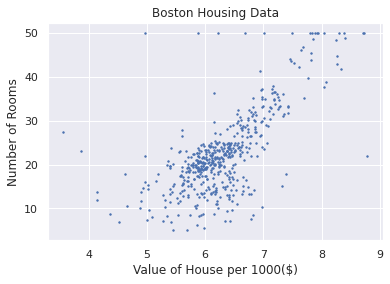

In [9]:
# plot
fig, ax = plt.subplots()
ax.scatter(X_rooms, y, s=2)
ax.set(
    title="Boston Housing Data",
    xlabel="Value of House per 1000($)",
    ylabel="Number of Rooms",
)
plt.show()

### Fitting a regression model

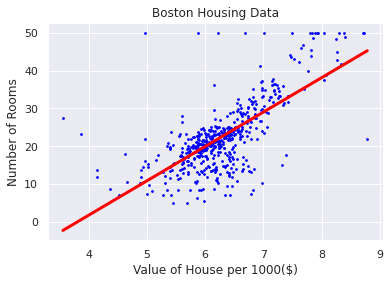

In [10]:
linreg = LinearRegression()
linreg.fit(X_rooms, y)

pred_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(X_rooms, y, s=3, color="blue")
ax.plot(pred_space, linreg.predict(pred_space), color="red", linewidth=3)
ax.set(
    title="Boston Housing Data",
    xlabel="Value of House per 1000($)",
    ylabel="Number of Rooms",
)
plt.show()

### split the data into train and test sets

In [11]:
splits = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits

# all features
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# R squared
print(f"R-squared: {linreg.score(X_test, y_test)}")


R-squared: 0.7112260057484974


## Gapminder Data

In [12]:
# gapminder data
# ===============
gapminder = pd.read_csv(data_file + "gm_2008_region.csv")
print(f"\n{gapminder.head()}")




   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


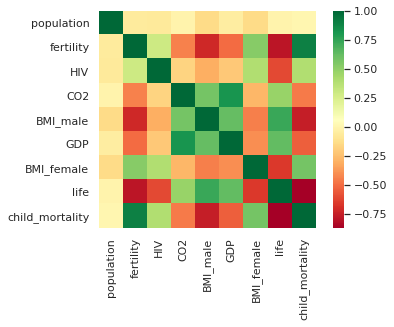

In [13]:
sns.heatmap(gapminder.corr(), square=True, cmap="RdYlGn")
plt.show()


In [14]:
# fertility vs life
X = gapminder.fertility.values
y = gapminder.life.values

print(f"\nshape X: {X.shape}\nshape y: {y.shape}")

# reshape
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print(f"\nshape X: {X.shape}\nshape y: {y.shape}")


shape X: (139,)
shape y: (139,)

shape X: (139, 1)
shape y: (139, 1)


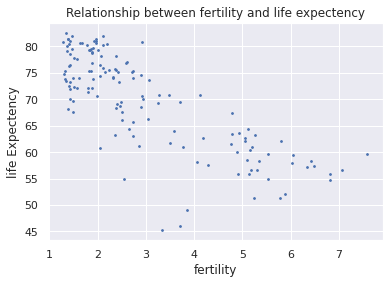

In [15]:
# Visualize the relationship between fertility and life
fig, ax = plt.subplots()
ax.scatter(X, y, s=3)
ax.set(
    title="Relationship between fertility and life expectency",
    xlabel="fertility",
    ylabel="life Expectency",
)
plt.show()

R-squared: 0.6192442167740035


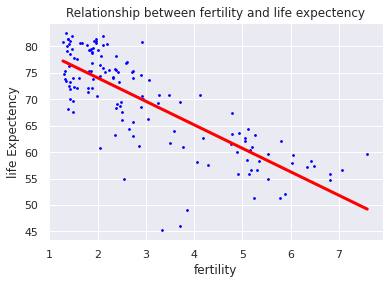

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"R-squared: {lin_reg.score(X, y)}")

prediction_space = np.linspace(X.min(), X.max()).reshape(-1, 1)

# regression line
fig, ax = plt.subplots()
ax.scatter(X, y, s=3, color="blue")
ax.plot(prediction_space, lin_reg.predict(prediction_space), color="red", linewidth=3)
ax.set(
    title="Relationship between fertility and life expectency",
    xlabel="fertility",
    ylabel="life Expectency",
)
plt.show()

### taking all features

In [17]:
# taking all features
X = gapminder.drop(["life", "Region"], axis=1).values
y = gapminder.life.values
y = y.reshape(-1, 1)
print(X.shape)
print(y.shape)

# split
splits = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print(f"R-squared: {lin_reg.score(X_test, y_test)}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

(139, 8)
(139, 1)
R-squared: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


# Cross Validation

In [18]:
# Cross-Validation

cv_results = cross_val_score(lin_reg, X, y, cv=5)
print(f"cv results:\n{cv_results}")


cv results:
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


## Regularized regression
### Ridge Regression

In [19]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(f"Ridge Score: {ridge.score(X_test, y_test)}")


Ridge Score: 0.8442469959975754


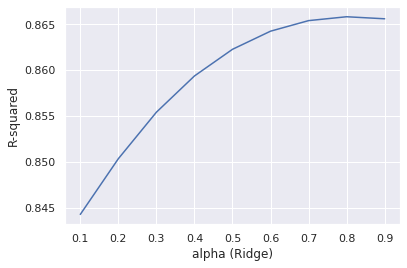

In [20]:
fig, ax = plt.subplots()
alphas = np.linspace(0.1, 0.9, num=9)
rsl = []
for i in alphas:
    ridge = Ridge(alpha=i, normalize=True)
    ridge.fit(X_train, y_train)
    rs = ridge.score(X_test, y_test)
    rsl.append(rs)
ax.plot(alphas, rsl)
ax.set(xlabel="alpha (Ridge)", ylabel="R-squared")
plt.show()


## Lasso Regression
* can be used to select important features of a dataset
* it shrinks the coefficient of less important features to exactly 0

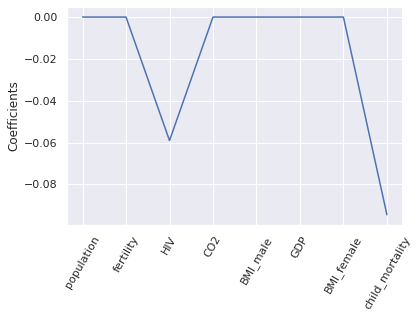

In [21]:
lasso = Lasso(alpha=0.3, normalize=True)
lasso_coef = lasso.fit(X, y).coef_

names = gapminder.drop(["life", "Region"], axis=1).columns

fig, ax = plt.subplots()
ax.plot(range(len(names)), lasso_coef)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_ylabel("Coefficients")
plt.show()


### Regularization II: Ridge

fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each

In [22]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(
        alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2
    )
    ax.set_ylabel("CV Score +/- Std Error")
    ax.set_xlabel("Alpha")
    ax.axhline(np.max(cv_scores), linestyle="--", color=".5")
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale("log")
    plt.show()


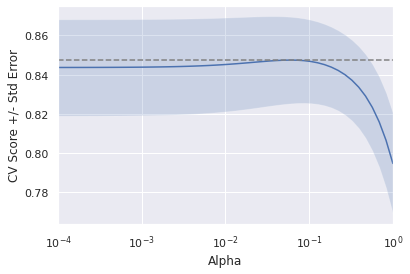

In [23]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha

    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)

    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))

    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)